### Анализ Датасет TNSum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format ='{:,.3f}'.format # Для отображения данных без e

In [ ]:
from datasets import load_dataset

raw_data = load_dataset("CDA-RFTA/TNSum", split="train")
raw_data = pd.DataFrame(raw_data)
raw_data.to_csv("tnsum_dataset.csv")

/home/egorp/MyProgs/uni/annotations/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since CDA-RFTA/TNSum couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/egorp/.cache/huggingface/datasets/CDA-RFTA___tn_sum/default/0.0.0/49a0392b2edea032a112c4b428079a5c8854af8b (last modified on Wed Apr 30 21:44:35 2025).


In [3]:
raw_data = pd.read_csv("../my_datasets/tnsum_dataset.csv", index_col=0)
raw_data

,text,summary
0,На фоне истощения запасов вооружения в западны...,На фоне истощения запасов вооружения в западны...
1,"ДОХА, 21 ноя —ПРАЙМ. Катарская национальная не...",Катарская национальная нефтегазовая компания Q...
2,Россия обсудит с ОНН вопрос о возобновлении по...,Россия обсудит с ООН вопрос о возобновлении по...
3,"Евгений Томихин указал, что эта тема обсуждает...",Посол РФ выразил надежду на подвижки в вопросе...
4,"МОСКВА, 23 ноя — ПРАЙМ. Индонезии требуются ин...",Индонезии требуются инвестиции в размере 179 м...
...,...,...
26916,"МОСКВА, 29 ноября. /ТАСС/. Компания Uranium On...",29 ноября 2021 года компания Uranium One Holdi...
26917,«Российские и индийские специалисты провели бо...,Россия и Индия подписали контракт о совместном...
26918,"МОСКВА, 6 дек — ПРАЙМ. Совместное российско-ин...",Совместное российско-индийское предприятие в и...
26919,"НЬЮ-ДЕЛИ, 6 декабря. /ТАСС/. Индия приложит ус...",Индия приложит усилия для официального выделен...


In [14]:
raw_data.isna().sum()

text       0
summary    0
dtype: int64

In [15]:
print("Размер датасета: ", len(raw_data))

Размер датасета:  26921


Text(0, 0.5, 'Кол-во новостей')

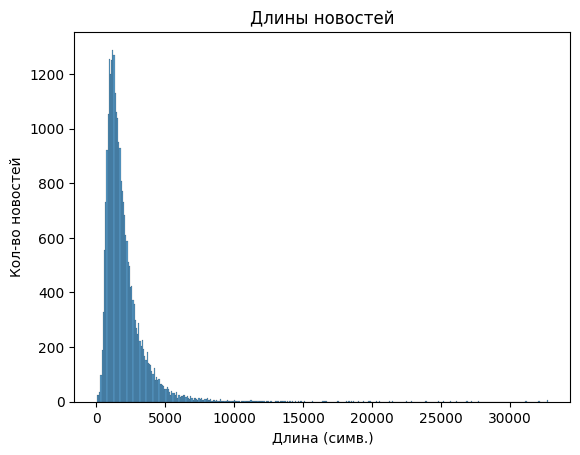

In [16]:
sns.histplot(
    raw_data["text"].map(len)
)
plt.title("Длины новостей")
plt.xlabel("Длина (симв.)")
plt.ylabel("Кол-во новостей")

In [17]:
raw_data["text"].map(len).describe([0.1, 0.5, 0.9])

count   26,921.000
mean     1,984.220
std      1,630.643
min         38.000
10%        791.000
50%      1,580.000
90%      3,543.000
max     32,767.000
Name: text, dtype: float64

Text(0, 0.5, 'Кол-во реф.')

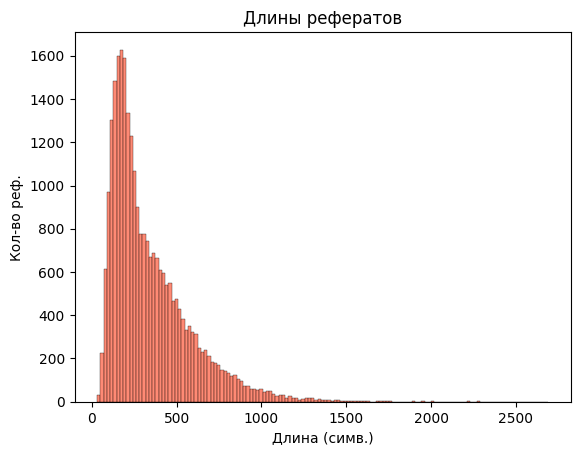

In [18]:
sns.histplot(
    raw_data["summary"].map(len),
    color="tomato"
)
plt.title("Длины рефератов")
plt.xlabel("Длина (симв.)")
plt.ylabel("Кол-во реф.")

In [19]:
raw_data["summary"].map(len).describe([0.1, 0.5, 0.9])

count   26,921.000
mean       344.526
std        241.208
min         31.000
10%        120.000
50%        268.000
90%        669.000
max      2,689.000
Name: summary, dtype: float64

##### Очистка данных

In [20]:
raw_data.head(5)

,text,summary
0,На фоне истощения запасов вооружения в западны...,На фоне истощения запасов вооружения в западны...
1,"ДОХА, 21 ноя —ПРАЙМ. Катарская национальная не...",Катарская национальная нефтегазовая компания Q...
2,Россия обсудит с ОНН вопрос о возобновлении по...,Россия обсудит с ООН вопрос о возобновлении по...
3,"Евгений Томихин указал, что эта тема обсуждает...",Посол РФ выразил надежду на подвижки в вопросе...
4,"МОСКВА, 23 ноя — ПРАЙМ. Индонезии требуются ин...",Индонезии требуются инвестиции в размере 179 м...


Как видно, некоторые новости из датасет содержат названия новостных агенств и некоторую дополнительную информацию. При токенизации текста, подобные метки могут быть ошибочно определены как отдельные предложения. Проблема состоит в том, что эти предложения не имеет смысловой ценности и лишь вносят шум в данные поэтому их необходимо удалить. 

Найдем названия всех новостных агенств при помощи регуярных выражений.

In [4]:
abbr_pat = r"[А-Я][А-Я]+, \d{1,2}.{5,10}[A-Я][А-Я]+. " 

In [22]:
print("Аббревиатур в тексте: ", raw_data["text"].str.findall(abbr_pat).explode().nunique())
print(raw_data["text"].str.findall(abbr_pat).explode().dropna())

Аббревиатур в тексте:  1607
1           ДОХА, 21 ноя —ПРАЙМ. 
4        МОСКВА, 23 ноя — ПРАЙМ. 
7           МОСКВА, 23 ноя - РИА 
9          ВАРШАВА, 23 ноя – РИА 
23       МОСКВА, 23 ноя — ПРАЙМ. 
                   ...           
26898       МОСКВА, 14 окт - РИА 
26903       МОСКВА, 29 окт - РИА 
26908       МОСКВА, 15 ноя — РИА 
26909      ДАБИ, 18 ноя — ПРАЙМ. 
26918     МОСКВА, 6 дек — ПРАЙМ. 
Name: text, Length: 2790, dtype: object


In [23]:
print("Аббревиатур в рефератах: ", raw_data["summary"].str.findall(abbr_pat).explode().nunique())
print(raw_data["summary"].str.findall(abbr_pat).explode().dropna())

Аббревиатур в рефератах:  16
19386      МАДРИД, 20 сен — ПРАЙМ. 
19448      МОСКВА, 21 сен – ПРАЙМ, 
19458      БЕРЛИН, 21 сен — ПРАЙМ. 
19489      МОСКВА, 22 сен — ПРАЙМ. 
19509    БРЮССЕЛЬ, 22 сен — ПРАЙМ. 
19672      МОСКВА, 26 сен — ПРАЙМ, 
19805       МОСКВА, 2 окт — ПРАЙМ. 
20267      МОСКВА, 19 окт — ПРАЙМ. 
20282      МОСКВА, 19 окт — ПРАЙМ. 
20421    БУДАПЕШТ, 20 окт — ПРАЙМ. 
24738      МОСКВА, 21 сен — ПРАЙМ. 
24795      МОСКВА, 22 сен — ПРАЙМ. 
24810      МОСКВА, 22 сен — ПРАЙМ. 
24834      МОСКВА, 22 сен — ПРАЙМ. 
24849      МОСКВА, 22 сен — ПРАЙМ. 
24903      МОСКВА, 23 сен — ПРАЙМ. 
24924      МОСКВА, 23 сен — ПРАЙМ. 
24965      МОСКВА, 25 сен — ПРАЙМ. 
24980      МОСКВА, 25 сен — ПРАЙМ. 
24995      МОСКВА, 26 сен — ПРАЙМ. 
25067      МОСКВА, 27 сен — ПРАЙМ. 
25164     ТЕГЕРАН, 26 сен — ПРАЙМ. 
25687      МОСКВА, 20 окт — ПРАЙМ. 
25688      МОСКВА, 20 окт — ПРАЙМ. 
25709      МОСКВА, 20 окт — ПРАЙМ. 
Name: summary, dtype: object


Удалим все найденные аббревиатуры:

In [5]:
raw_data["text"] = raw_data["text"].str.replace(abbr_pat, "", regex=True)
raw_data["summary"] = raw_data["summary"].str.replace(abbr_pat, "", regex=True)

Можно заметить что некоторые новости все ещё содержат метки ТАСС, только в другом формате:

In [25]:
raw_data["text"].tail(5)

26916    МОСКВА, 29 ноября. /ТАСС/. Компания Uranium On...
26917    «Российские и индийские специалисты провели бо...
26918    Совместное российско-индийское предприятие в и...
26919    НЬЮ-ДЕЛИ, 6 декабря. /ТАСС/. Индия приложит ус...
26920    БУЭНОС-АЙРЕС, 8 декабря. /ТАСС/. Аргентинская ...
Name: text, dtype: object

Удалим все метки при помощи регулярного выражения:

In [6]:
tass_abbr_pat = r"[А-Я][А-Я]+, \d{1,2} [а-я]{3,8}. /[А-Я][А-Я]+/. "

In [7]:
print("Аббревиатур в тексте: ", raw_data["text"].str.findall(tass_abbr_pat).explode().nunique())
print(raw_data["text"].str.findall(tass_abbr_pat).explode().dropna())

Аббревиатур в тексте:  2018
3        МОСКВА, 21 ноября. /ТАСС/. 
19         ЙОРК, 23 ноября. /ТАСС/. 
24        МИНСК, 23 ноября. /ТАСС/. 
27       МОСКВА, 30 ноября. /ТАСС/. 
28         ЙОРК, 30 ноября. /ТАСС/. 
                    ...             
26914    МОСКВА, 26 ноября. /ТАСС/. 
26915    МОСКВА, 29 ноября. /ТАСС/. 
26916    МОСКВА, 29 ноября. /ТАСС/. 
26919      ДЕЛИ, 6 декабря. /ТАСС/. 
26920     АЙРЕС, 8 декабря. /ТАСС/. 
Name: text, Length: 2618, dtype: object


In [8]:
print("Аббревиатур в рефератах: ", raw_data["summary"].str.findall(tass_abbr_pat).explode().nunique())
print(raw_data["summary"].str.findall(tass_abbr_pat).explode().dropna())

Аббревиатур в рефератах:  0
Series([], Name: summary, dtype: object)


In [9]:
raw_data["text"] = raw_data["text"].str.replace(tass_abbr_pat, "", regex=True)

Также в тексте все ещё присутствуют подобные аббревиатуры: 

In [30]:
raw_data["text"][1000]

'Берлин, , 15:45 — REGNUM Германия начала переброску двух из трех американских систем противоракетной обороны (ПРО) Patriot в Польшу, сообщает агентство DPA. ЗРК Patriot Иван Шилов (с) ИА REGNUM Ожидается, что системы ПРО должны быть развернуты в районе города Замосць на юго-востоке Польши. По данным агентства, целью Германии является оказание помощи Польше в защите воздушного пространства, а также укрепление восточного фланга НАТО. Как сообщало ИА REGNUM, ранее на тот момент министр обороны Германии Кристина Ламбрехт заявила, что падение ракеты, запущенной киевским режимом, в Польше выявило серьёзные бреши в системе противовоздушной обороны Европы. Читайте ранее в этом сюжете: В Германии рассказали о проблемах в европейской системе ПВО'

Составим регулярное выражение для данных аббревиатур:

In [10]:
abbr2_pat = r'[А-Я][а-я]+, , \d{1,2}:\d{1,2}.{3,5}[A-Z][A-Z]{1,10}.'

In [11]:
print("Найдено аббревиатур в тексте:", raw_data["text"].str.findall(abbr2_pat).explode().dropna().nunique())
print("Найдено аббревиатур в рефератах:", raw_data["summary"].str.findall(abbr2_pat).explode().dropna().nunique())

Найдено аббревиатур в тексте: 607
Найдено аббревиатур в рефератах: 44


Удалим найденные аббревиатуры из текста:

In [12]:
raw_data["text"] = raw_data["text"].str.replace(abbr2_pat, "")
raw_data["summary"] = raw_data["summary"].str.replace(abbr2_pat, "")

Разобъем слова на токены для нахождения оставшихся элементов для очистки:

In [13]:
from razdel import tokenize

text_tokens = raw_data["text"].map(
    lambda text: [t.text for t in tokenize(text)]
).explode()

In [14]:
text_tokens.value_counts(ascending=True).head(20)

text
soya-1879060062           1
13,79                     1
Houthi-run                1
Sharaf                    1
desecration               1
Trademarks                1
Momika                    1
al-Adha                   1
Evashnee                  1
non-African               1
20230704                  1
agrarii-1882042558        1
150699/62/1506996218_0    1
304,9                     1
субъектов-экспортеров     1
456,8                     1
Assal                     1
EECA                      1
LMTL                      1
GCFR                      1
Name: count, dtype: int64

Результаты показывают, что некоторые статьи содержат ссылки. Составим регулярное выражение для обнаружения таких ссылок в тексте:

In [15]:
import re

url_pat = re.compile(
    r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)'
    r'(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+'
    r'(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'
)

In [16]:
print("Найдено url в тексте:", raw_data["text"].str.findall(url_pat).explode().dropna().nunique())
print("Найдено url в рефератах:", raw_data["summary"].str.findall(url_pat).explode().dropna().nunique())

Найдено url в тексте: 2870
Найдено url в рефератах: 2


Вместо того, чтобы удалять URL из текста, предлагается удалить предложения, содержащие ссылки. Для этого выполним токенизацию текста по предложениям: 

In [17]:
from razdel import sentenize
text_sents = raw_data["text"].map(lambda text: [s.text for s in sentenize(text)])

In [39]:
print("Всего предложений:", len(text_sents.explode()))

Всего предложений: 337462


In [18]:
deleted_sents = text_sents.map(
    lambda sents: [s for s in sents if url_pat.search(s)]
)
text_sents = text_sents.map(
    lambda sents: [s for s in sents if not url_pat.search(s)]
)

In [19]:
print("Предложений без url:", len(text_sents.explode()))
print("Примеры удаленных предложений:")
print(deleted_sents.explode().dropna().head(10))
del deleted_sents

Предложений без url: 334919
Примеры удаленных предложений:
7     https://ria.ru/20221123/uralkhim-1833567401.ht...
7     РИА Новости, 23.11.2022 2022-11-23T10:24 2022-...
7     "Уралхим" является материнской компанией "Урал...
9     https://ria.ru/20221123/gaz-1833605263.html Пр...
9     РИА Новости, 23.11.2022 2022-11-23T12:12 2022-...
9     И это меня беспокоит", - добавил он.Европейска...
25    https://ria.ru/20221123/udobreniya-1833562195....
25    РИА Новости, 23.11.2022 2022-11-23T10:05 2022-...
25    Срок действия меморандума, в свою очередь, сос...
60    Регистрация на сайте РЭЦ до 13 декабря: https:...
Name: text, dtype: object


Аналогично удалим все ссылки из рефератов:

In [20]:
summ_sents = raw_data["summary"].map(lambda text: [s.text for s in sentenize(text)])
print("Всего предложений:", len(summ_sents.explode()))

Всего предложений: 64932


In [21]:
deleted_sents = summ_sents.map(
    lambda sents: [s for s in sents if url_pat.search(s)]
)
summ_sents = summ_sents.map(
    lambda sents: [s for s in sents if not url_pat.search(s)]
)

In [22]:
print("Предложений без url:", len(summ_sents.explode()))
print("Примеры удаленных предложений:")
print(deleted_sents.explode().dropna().head(10))
del deleted_sents

Предложений без url: 64930
Примеры удаленных предложений:
5452    Источник: https://milknews.ru/index/maslo/masl...
9763    Организаторы Вэйхайской международной выставки...
Name: summary, dtype: object


Датасет почти очищен и теперь важно добавить столбцы с информацией которая будет использоваться дальше для нормализации: 

In [23]:
text_lens = raw_data["text"].map(len)
sents_count = text_sents.map(len)
sents_pos = text_sents.map(
    lambda sents: list(range(1, len(sents)+1))
)

In [24]:
clean_data = pd.concat(
    [text_sents, summ_sents, text_lens, sents_count, sents_pos], 
    axis=1,
    keys=["text", "summary", "text_len", "sents_count", "sents_pos"]
)
print("Размер датасета:", len(clean_data))

Размер датасета: 26921


Сопоставим предложения текстов с рефератами. Если предложение есть в реферате присвоим ему метку 1, если его нет - 0.

In [25]:
def sent_in_sum(row):
    return sum(
        [
            1 if s in row["summary"] else 0
            for s in row["text"]
        ]
    ) > 0

In [48]:
clean_data

,text,summary,text_len,sents_count,sents_pos
0,[На фоне истощения запасов вооружения в западн...,[На фоне истощения запасов вооружения в западн...,2287,17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,[Катарская национальная нефтегазовая компания ...,[Катарская национальная нефтегазовая компания ...,910,6,"[1, 2, 3, 4, 5, 6]"
2,[Россия обсудит с ОНН вопрос о возобновлении п...,[Россия обсудит с ООН вопрос о возобновлении п...,1175,11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
3,"[Евгений Томихин указал, что эта тема обсуждае...",[Посол РФ выразил надежду на подвижки в вопрос...,1294,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
4,[Индонезии требуются инвестиции в размере 179 ...,[Индонезии требуются инвестиции в размере 179 ...,1285,9,"[1, 2, 3, 4, 5, 6, 7, 8, 9]"
...,...,...,...,...,...
26916,[Компания Uranium One Holding N. V. (предприят...,[29 ноября 2021 года компания Uranium One Hold...,1058,6,"[1, 2, 3, 4, 5, 6]"
26917,[«Российские и индийские специалисты провели б...,[Россия и Индия подписали контракт о совместно...,338,2,"[1, 2]"
26918,[Совместное российско-индийское предприятие в ...,[Совместное российско-индийское предприятие в ...,1133,7,"[1, 2, 3, 4, 5, 6, 7]"
26919,[НЬЮ-Индия приложит усилия для официального вы...,[Индия приложит усилия для официального выделе...,3538,20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [26]:
sents_in_summ  = clean_data.apply(
    lambda row: 1 if sent_in_sum(row) else 0,
    axis=1
)
print("Реферат включает предложения для: ", sum(sents_in_summ))
del sents_in_summ

Реферат включает предложения для:  9148


Удалим те записи, рефераты которых не включают предложения из исходного текста:

In [27]:
clean_data = clean_data.apply(
    lambda row: row if sent_in_sum(row) else None,
    axis=1
).dropna()
print("Размер датасета:", len(clean_data))

Размер датасета: 9148


Добавим метки вхождения в реферат:

In [28]:
clean_data["labels"] = clean_data.apply(
    lambda row: [
        1 if s in row["summary"] else 0
        for s in row["text"]
    ],
    axis=1
)

Удалим ненужный столбец:

In [29]:
clean_data = clean_data.drop("summary", axis=1)

Разобъем списки в остальных столбцах:

In [30]:
clean_data = clean_data.explode(["text", "labels", "sents_pos"], ignore_index=True)
clean_data.to_csv("clean_tnsum.csv")

##### Обработка признаков

Text(0.5, 1.0, 'Длина текста')

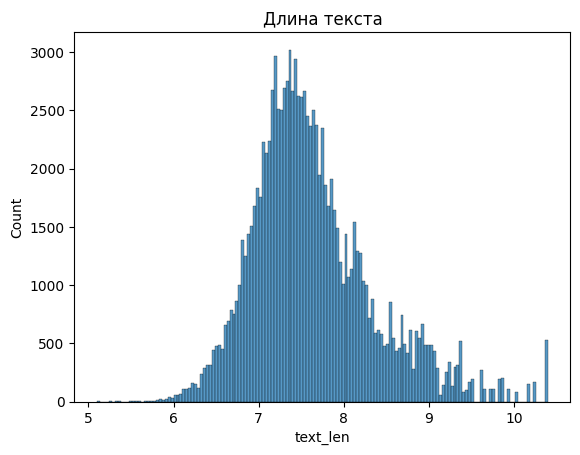

In [ ]:
sns.histplot(np.log(clean_data["text_len"]))
plt.title("Длина текста новостей")
plt.xlabel("ДЛина ")

In [2]:
preprocessed_data = pd.read_csv("clean_tnsum.csv", index_col=0)
preprocessed_data

,text,text_len,sents_count,sents_pos,labels
0,На фоне истощения запасов вооружения в западны...,"2,287.000",17.000,1,1
1,Об этом 22 ноября сообщает газета Le Monde.,"2,287.000",17.000,2,0
2,«Запасы боеприпасов в западных арсеналах истощ...,"2,287.000",17.000,3,0
3,Отныне страны должны использовать свои критиче...,"2,287.000",17.000,4,0
4,"Отмечается, что страны — поставщики оружия сам...","2,287.000",17.000,5,0
...,...,...,...,...,...
111372,Об автомобиле Автомобиль оснащен двигателем Vo...,"2,104.000",17.000,13,0
111373,"""ГАЗель NN"" комплектуется 6-ступенчатой коробк...","2,104.000",17.000,14,0
111374,"""Применение новой коробки передач позволило ул...","2,104.000",17.000,15,0
111375,"Группа ""ГАЗ"" объединяет предприятия, выпускающ...","2,104.000",17.000,16,0


Признак наличия цитаты:

In [3]:
quote_pat = "«|\"|\'"

preprocessed_data["have_quote"] = preprocessed_data["text"].str.contains(quote_pat, regex=True, na=False)

total_summ = len(preprocessed_data[preprocessed_data["labels"] == 1])
summ_have_quotes = sum(preprocessed_data[preprocessed_data["labels"] == 1]["have_quote"])

print("Всего рефератов:", total_summ)
print("Рефератов содержит цитаты:", summ_have_quotes, f"({summ_have_quotes / total_summ * 100:.2f} %)")

total_sents = len(preprocessed_data)
sents_have_quotes = sum(preprocessed_data["have_quote"])

print("Всего предложений:", total_sents)
print("Предложений с цитатами:", sents_have_quotes, f"({sents_have_quotes / total_sents * 100:.2f} %)")

Всего рефератов: 19044
Рефератов содержит цитаты: 1744 (9.16 %)
Всего предложений: 111377
Предложений с цитатами: 23525 (21.12 %)


90 % рефератов не содержит цитаты поэтому их наличие может являться значимым для прогнозирования признаком.

Наличие чисел:

In [4]:
numb_pat = r"\d+"

preprocessed_data["have_number"] = preprocessed_data["text"].str.contains(numb_pat, regex=True, na=False)

summ_have_number = sum(preprocessed_data[preprocessed_data["labels"] == 1]["have_number"])

print("Всего рефератов:", total_summ)
print("Рефератов содержит числа:", summ_have_number, f"({summ_have_number / total_summ * 100:.2f} %)")

sents_have_number = sum(preprocessed_data["have_number"])

print("Всего предложений:", total_sents)
print("Предложений с числами:", sents_have_number, f"({sents_have_number / total_sents * 100:.2f} %)")

Всего рефератов: 19044
Рефератов содержит числа: 10187 (53.49 %)
Всего предложений: 111377
Предложений с числами: 50853 (45.66 %)


Как видно, почти половина предложений в реферате и во всем датасете содержит цифр, поэтому на основание этого признака нельзя сделать более точный прогноз, а следовательно данный признак не следует включать в датасет:

In [5]:
preprocessed_data = preprocessed_data.drop("have_number", axis=1)

Добавим в качестве признака нормализованную длину предложения:

In [6]:
preprocessed_data["sent_len"] = preprocessed_data.apply(
    lambda row: -np.log(len(row) / row["text_len"]),
    axis=1
)

Text(0.5, 1.0, 'Длины предложений')

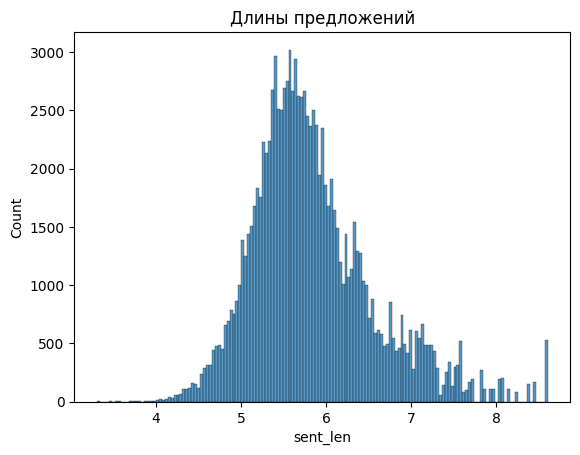

In [36]:
sns.histplot(preprocessed_data["sent_len"])
plt.title("Длины предложений")

Также добавим нормализованные позиции предложений в тексте:

In [7]:
preprocessed_data["sent_pos"] = preprocessed_data.apply(
    lambda row: row["sents_pos"] / row["sents_count"] * 100,
    axis=1
)

Удалим ненужные столбцы:

In [8]:
preprocessed_data = preprocessed_data.drop(
    ["text_len", "sents_count", "sents_pos"],
    axis=1
)

Добавим категориальные данные. Зададим следующее количество категорий для позиции и длины:

In [9]:
pos_cats = 1

Text(0, 0.5, 'Кол-во предл.')

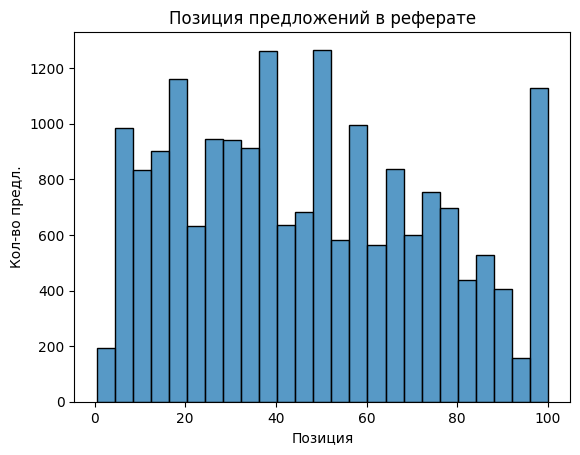

In [62]:
sns.histplot(
    preprocessed_data[preprocessed_data["labels"]==1]["sent_pos"],
    bins=pos_cats
)
plt.title("Позиция предложений в реферате")
plt.xlabel("Позиция")
plt.ylabel("Кол-во предл.")

Text(0, 0.5, 'Кол-во предл.')

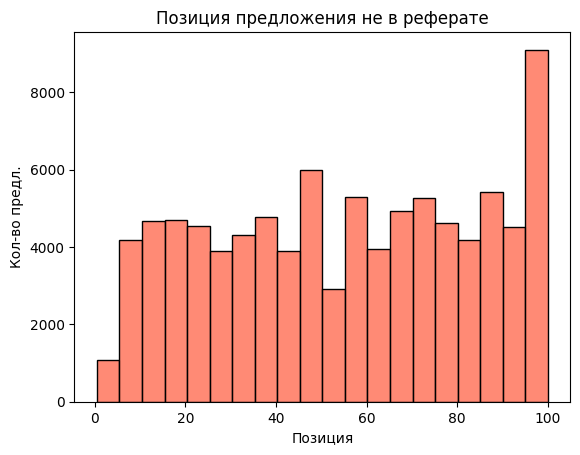

In [42]:
sns.histplot(
    preprocessed_data[preprocessed_data["labels"]==0]["sent_pos"],
    bins=pos_cats,
    color="tomato")
plt.title("Позиция предложения не в реферате")
plt.xlabel("Позиция")
plt.ylabel("Кол-во предл.")

Зададим количество категорий для длины предложения:

In [11]:
len_cats = 1

Text(0, 0.5, 'Кол-во предл.')

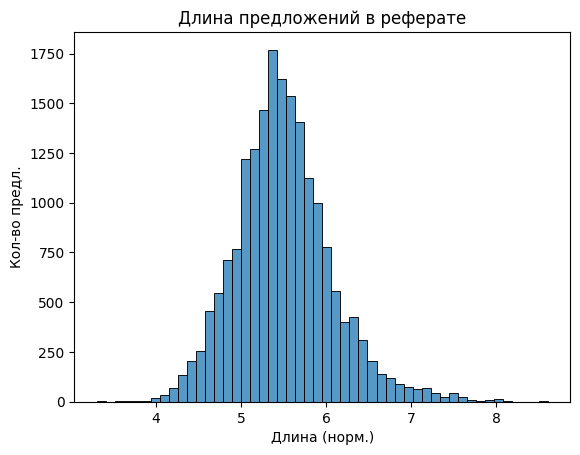

In [57]:
sns.histplot(
    preprocessed_data[preprocessed_data["labels"]==1]["sent_len"], 
    bins=len_cats
)
plt.title("Длина предложений в реферате")
plt.xlabel("Длина (норм.)")
plt.ylabel("Кол-во предл.")

Text(0, 0.5, 'Кол-во предл.')

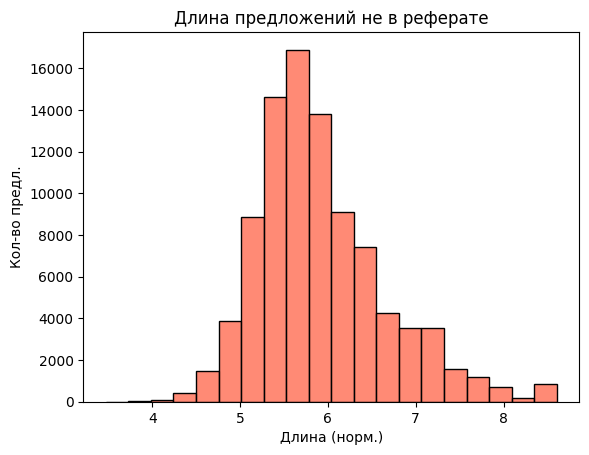

In [45]:
sns.histplot(
    preprocessed_data[preprocessed_data["labels"]==0]["sent_len"], 
    bins=len_cats,
    color="tomato"
)
plt.title("Длина предложений не в реферате")
plt.xlabel("Длина (норм.)")
plt.ylabel("Кол-во предл.")

Как будто длина одинакова в обоих случаях... 

In [46]:
preprocessed_data[preprocessed_data["labels"]==0]["sent_len"].describe()

count   92,333.000
mean         5.919
std          0.733
min          3.471
25%          5.419
50%          5.781
75%          6.300
max          8.605
Name: sent_len, dtype: float64

In [47]:
preprocessed_data[preprocessed_data["labels"]==1]["sent_len"].describe()

count   19,044.000
mean         5.504
std          0.570
min          3.308
25%          5.140
50%          5.465
75%          5.817
max          8.605
Name: sent_len, dtype: float64

Разобъем данные по категориям:

In [12]:
categorized_len = pd.cut(preprocessed_data["sent_len"], len_cats)
categorized_len_columns = pd.get_dummies(categorized_len, prefix="categorized_len")
categorized_len_columns

,"categorized_len_(3.303, 8.605]"
0,True
1,True
2,True
3,True
4,True
...,...
111372,True
111373,True
111374,True
111375,True


In [13]:
categorized_pos = pd.cut(preprocessed_data["sent_pos"], pos_cats)
categorized_pos_columns = pd.get_dummies(categorized_pos, prefix="categorized_pos")
categorized_pos_columns

,"categorized_pos_(0.393, 100.0]"
0,True
1,True
2,True
3,True
4,True
...,...
111372,True
111373,True
111374,True
111375,True


Объединим все столбцы в датафрейм:

In [71]:
categorized_data = pd.concat(
    [preprocessed_data,
     categorized_len_columns,
     categorized_pos_columns
    ],
    axis=1
)
categorized_data.to_csv(f"tnsum_{len(categorized_data.columns)}.csv")

Без длины:

In [14]:
categorized_data = pd.concat(
    [preprocessed_data,
     categorized_pos_columns],
    axis=1
)
categorized_data.to_csv(f"tnsum_{len(categorized_data.columns)}.csv")

Без категорий:

In [9]:
preprocessed_data = preprocessed_data.drop("sents_pos", axis=1)

In [10]:
preprocessed_data.columns

Index(['text', 'text_len', 'sents_count', 'labels', 'have_quote', 'sent_len',
       'sent_pos'],
      dtype='object')

In [11]:
preprocessed_data.to_csv("uncat_tnsum.csv")

Дальше не знаю что :(